In [3]:
%matplotlib inline

In [1]:
!pip install wordcloud

    100% |████████████████████████████████| 174kB 2.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for wordcloud ... done
  Stored in directory: /home/rasmuserik/.cache/pip/wheels/d9/4c/ac/e63c45f2ce09860e9459a410953039c30296e89d9f7234675f
Successfully built wordcloud


In [24]:
import requests
url = "https://www.gutenberg.org/files/2981/2981-0.txt" # casanova
url = "https://www.gutenberg.org/files/1524/1524-0.txt" # hamlet
text = requests.get(url).text


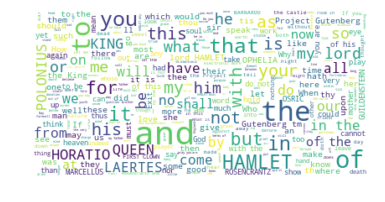

In [25]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    max_words=4000,
    stopwords=["Project Gutenberg"],
    background_color= 'white', 
    max_font_size=40
).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
